## This google colab notebook introduces basic Image Processing Methods such as Image Histogram, Intensity Transformation, Thresholding and Filtering. Use the following drive link to access the images.
https://drive.google.com/open?id=1QC910Yh70rkaUm9B3fLEJQRQMCbNkw9h


## Mounting the google drive and loading requried libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

## Various ways of reading images

In [5]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lena.png')
print (I.shape)


(512, 512, 3)


(137, 137, 4)


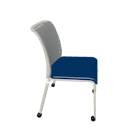

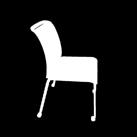

In [21]:
I = cv2.imread('/content/drive/My Drive/Image Processing/chair.png', cv2.IMREAD_UNCHANGED)
print (I.shape)
cv2_imshow(I)
cv2_imshow(I[:,:,3])

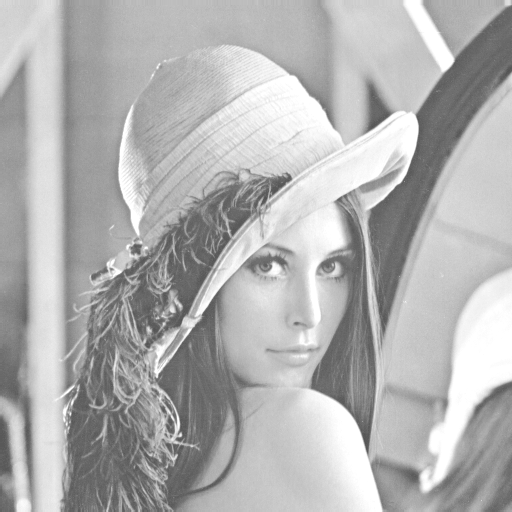

In [30]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
# need to change to int64
I = I.astype('int64')
I += 45
# Boundaries
I[I > 255] = 255
I = I.astype('uint8')
cv2_imshow(I)


In [0]:
def gamma_transform(image, gamma):
  transformed_img = image.astype('int64')
  transformed_img = (transformed_img/255)**gamma
  transformed_img = transformed_img * 255
  return transformed_img.astype('uint8')

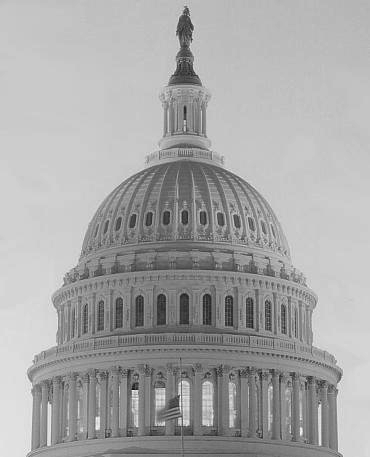

In [44]:
gamma = 1.5
I = cv2.imread('/content/drive/My Drive/Image Processing/gamma1.jpg')
cv2_imshow(gamma_transform(I, gamma))

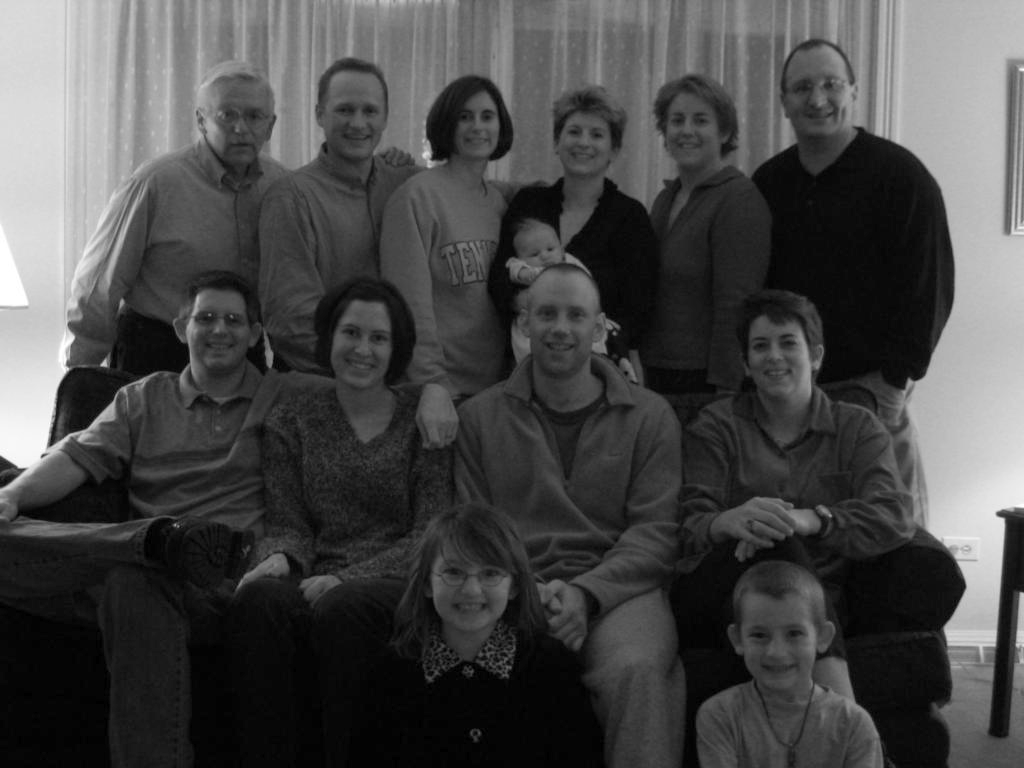

In [46]:
gamma = 0.8
I = cv2.imread('/content/drive/My Drive/Image Processing/gamma2.jpg')
cv2_imshow(gamma_transform(I, gamma))

## Greyscale histogram

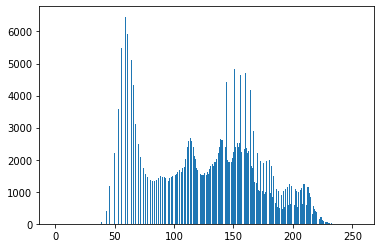

In [65]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lena.png', cv2.IMREAD_GRAYSCALE)
def plot_grayscale_hist(I):
  num_pixels = [0 for i in range(256)]
  for i in I.flatten():
    num_pixels[i]+=1
  plt.bar(range(256), num_pixels)

plot_grayscale_hist(I)

# Color Histogram

In [0]:
def plot_color_hist(image):
  plt.hist(image[:,:,0].flatten(), bins = 256, color="red")
  plt.hist(image[:,:,1].flatten(), bins = 256, color="green")
  plt.hist(image[:,:,2].flatten(), bins = 256, color="blue")    
  plt.show()

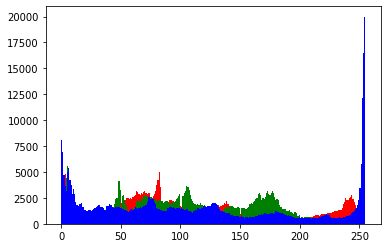

In [64]:
I = cv2.imread('/content/drive/My Drive/Image Processing/lotus.jpg')
plot_color_hist(I)

## Image Thresholding

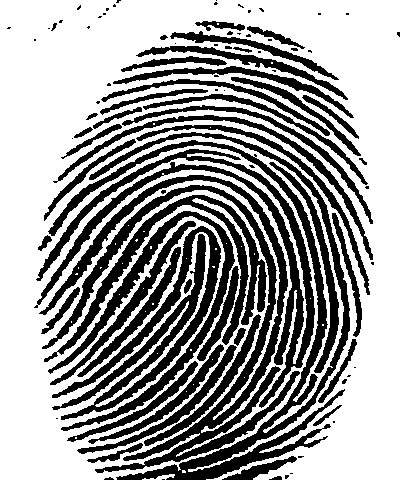

In [72]:
def threshold(image, thresh):
    return ((image>thresh) * 255).astype('uint8')

I = cv2.imread('/content/drive/My Drive/Image Processing/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(threshold(I,128))



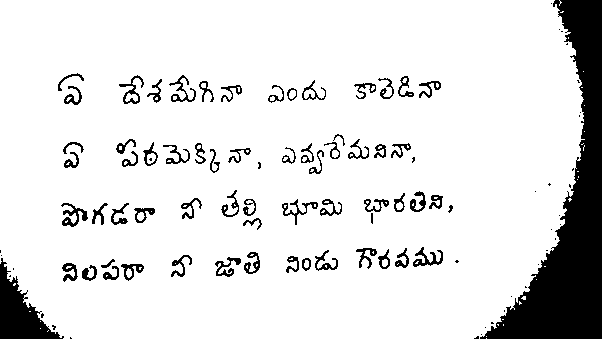

In [81]:
I = cv2.imread('/content/drive/My Drive/Image Processing/text.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(threshold(I,90))

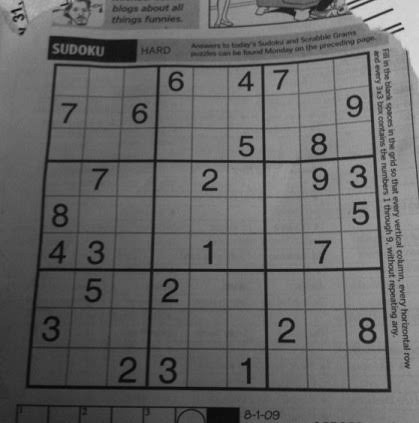

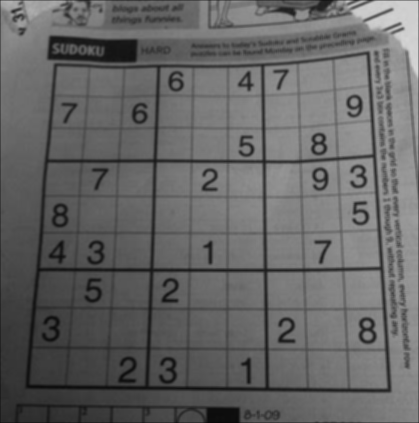

In [93]:
def convolve(image, filt):
  img_cpy = np.zeros(image.shape)
  for u in range(image.shape[0]):
    for v in range(image.shape[1]):
      for i in [-1,0,1]:
        for j in [-1, 0, 1]:
          if(0<=u+i and u+i<image.shape[0] and v+j>=0 and v+j<image.shape[1]):
            img_cpy[u+i ,v+j] += image[u,v]*filt[i+1,j+1]
  return img_cpy
f = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
I = cv2.imread('/content/drive/My Drive/Image Processing/sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)
cv2_imshow(convolve(I, f))


## Ex 3: Count the number of windows in image 'window.jpeg'.


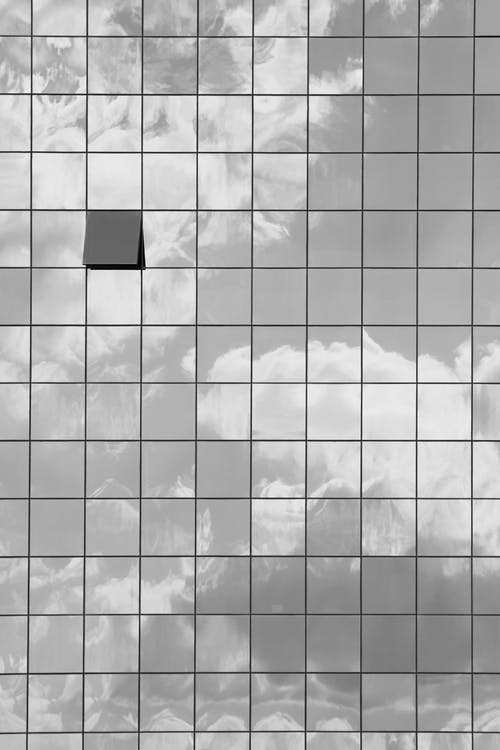

Number of windows
140


In [134]:
I = cv2.imread('/content/drive/My Drive/Image Processing/window.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(I)

sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
x_filtered = cv2.filter2D(I,-1,sobel_x)
x_filtered = threshold(x_filtered, 150)
x_filtered = x_filtered.astype('int64')

sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
y_filtered = cv2.filter2D(I,-1,sobel_y)
y_filtered = threshold(y_filtered, 120)
y_filtered = y_filtered.astype('int64')


x_filtered =np.average(x_filtered, axis = 0)
y_filtered = np.average(y_filtered, axis = 1)

num_x = 0
num_y = 0

flag = 1
thresh = 50
for val in x_filtered:
  if(val > thresh):
    if(flag == 1):
      num_x+=1
      flag = 0
  else:
    if(flag == 0):
      flag = 1

flag = 1
for val in y_filtered:
  if(val > thresh):
    if(flag == 1):
      num_y+=1
      flag = 0
  else:
    if(flag == 0):
      flag = 1
print("Number of windows")
print((num_x + 1)* (num_y + 1))